In [103]:
PATH = "./outputs"
SUBFOLDERS = ["wellbeing", "achievement", "delinquency", "ptsd"]
LABELS = ["gpt-5-mini", "Phi-4", "Qwen-3-30B", "Llama-3.3-70B", "Magistral-Small", "Qwen-Next-80B"]
GROLTS_LABELS_OLD = ["1","2","3a","3b","3c","4","5","6a","6b","7","8","9","10","11","12","13","14a","14b","14c","15","16"]
GROLTS_LABELS_NEW = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18"]

In [104]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Set general plot parameters for Overleaf (1-column A4)
plt.rcParams.update(
    {
        "figure.figsize": (3.3, 2.5),  # inches, ~1-column width
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 14,
        "pdf.fonttype": 42,  # vector fonts
        "ps.fonttype": 42,
    }
)

In [105]:
def load_llm_accuracies(df_labels, files):
    data = {}

    for f in files:
        df = pd.read_csv(f"{PATH}/{f}")
        filename = os.path.basename(f).replace(".csv", "")
        df_merged = df.merge(
            df_labels, on=["paper_id", "question_id"], suffixes=("_pred", "_true")
        )
        df_merged["correct"] = (df_merged["answer_pred"] == df_merged["answer_true"]).astype(int)
        acc = df_merged.groupby("question_id")["correct"].mean()
        data[filename] = acc

    acc_df = pd.DataFrame(data).sort_index()

    return acc_df


def plot_mapped_accuracy_heatmaps(acc_df, subfolder):
    # Sort for consistent mapping
    acc_df = acc_df.sort_index()

    plt.figure(figsize=(8, 5))  # wider to fit new column
    ax = sns.heatmap(
        acc_df,
        vmin=0,
        vmax=1,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        cbar=True,
        cbar_kws={"label": "Accuracy / Proportion of 1's", "pad": 0.1},
        annot=True,
        annot_kws={"size": 14},
        fmt=".2f",
    )
    ax.set_title(f"Per-Question Accuracy Comparison ({subfolder.capitalize()})")
    ax.set_xticklabels(LABELS, ha="center", rotation=30)
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.savefig(f"./viz/{subfolder}_comparison.pdf", bbox_inches="tight")
    plt.show()

    

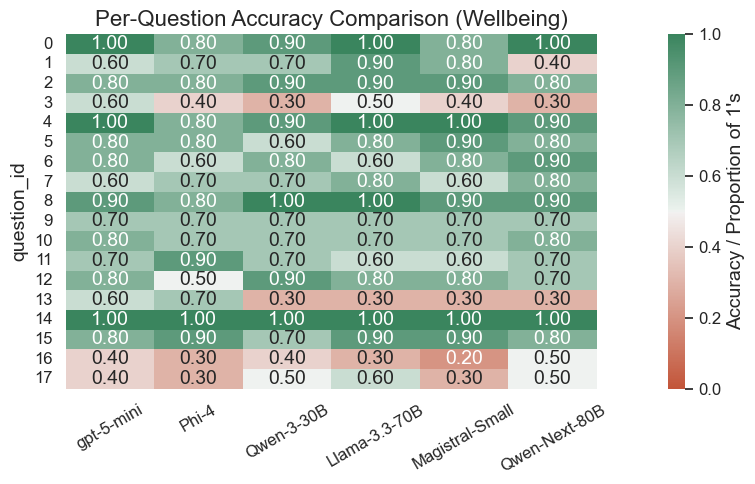

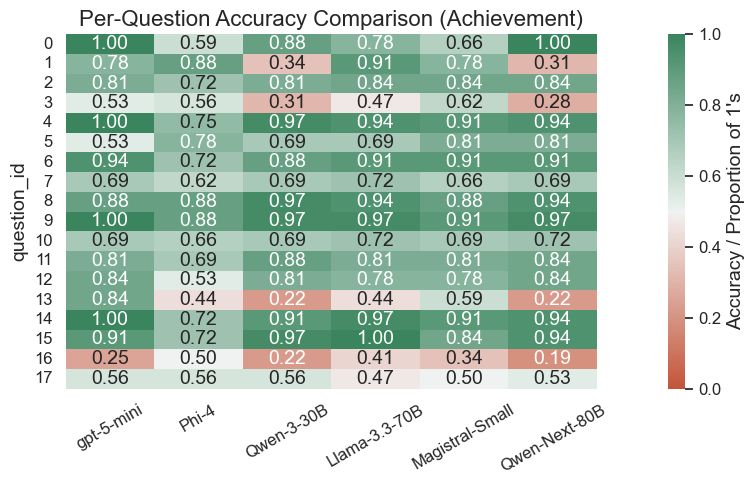

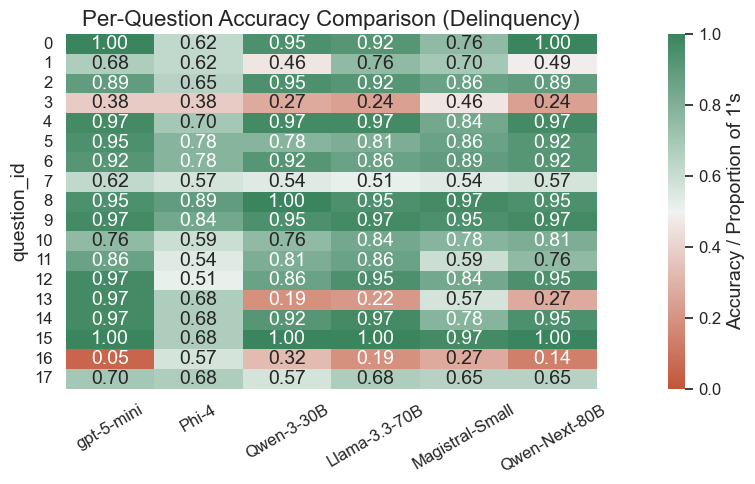

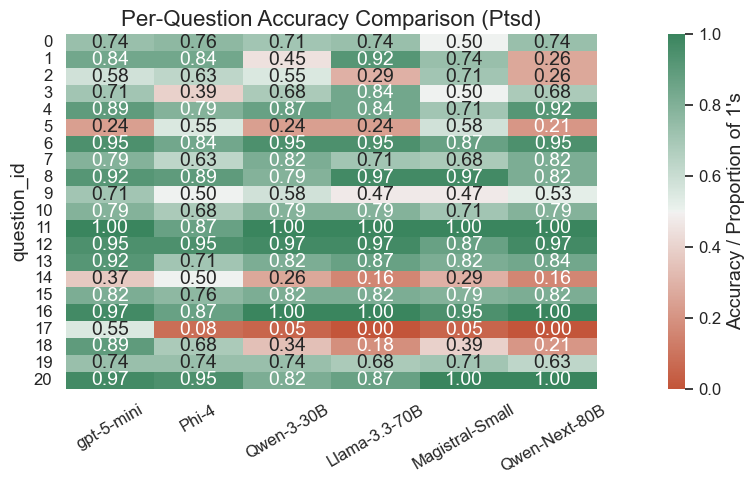

In [106]:
acc_dfs = []
# Load labels
for subfolder in SUBFOLDERS:
    df_labels = pd.read_csv(f"./human_labels/{subfolder}.csv", delimiter=";", dtype=int)
    df_labels = df_labels.melt(
        id_vars=["paper_id"], var_name="question_id", value_name="answer"
    )
    df_labels["paper_id"] = df_labels["paper_id"].astype(int)
    df_labels["question_id"] = df_labels["question_id"].astype(int)
    df_labels["answer"] = df_labels["answer"].astype(int)


    files = [
        f"Qwen_Qwen3-Embedding-8B_gpt-5-mini_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_microsoft_phi-4_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
    ]
    

    acc_df = load_llm_accuracies(df_labels, files)
    plot_mapped_accuracy_heatmaps(acc_df, subfolder)
    acc_dfs.append(acc_df)

In [107]:
for i, acc_df in enumerate(acc_dfs):
    print(f"Mean accuracies per model ({SUBFOLDERS[i].capitalize()}):")
    display(acc_df.mean().sort_values(ascending=False))

Mean accuracies per model (Wellbeing):


Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_wellbeing_500_3    0.744444
Qwen_Qwen3-Embedding-8B_gpt-5-mini_wellbeing_500_3                           0.738889
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_wellbeing_500_3     0.711111
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_wellbeing_500_3     0.705556
Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_wellbeing_500_3       0.700000
Qwen_Qwen3-Embedding-8B_microsoft_phi-4_wellbeing_500_3                      0.688889
dtype: float64

Mean accuracies per model (Achievement):


Qwen_Qwen3-Embedding-8B_gpt-5-mini_achievement_500_3                           0.781250
Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_achievement_500_3    0.763889
Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_achievement_500_3       0.746528
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_achievement_500_3     0.717014
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_achievement_500_3     0.708333
Qwen_Qwen3-Embedding-8B_microsoft_phi-4_achievement_500_3                      0.677083
dtype: float64

Mean accuracies per model (Delinquency):


Qwen_Qwen3-Embedding-8B_gpt-5-mini_delinquency_500_3                           0.812312
Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_delinquency_500_3    0.756757
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_delinquency_500_3     0.746246
Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_delinquency_500_3       0.738739
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_delinquency_500_3     0.734234
Qwen_Qwen3-Embedding-8B_microsoft_phi-4_delinquency_500_3                      0.653153
dtype: float64

Mean accuracies per model (Ptsd):


Qwen_Qwen3-Embedding-8B_gpt-5-mini_ptsd_500_0                           0.778195
Qwen_Qwen3-Embedding-8B_microsoft_phi-4_ptsd_500_0                      0.696742
Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_ptsd_500_0    0.681704
Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_ptsd_500_0       0.681704
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_ptsd_500_0     0.677945
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_ptsd_500_0     0.647870
dtype: float64

In [108]:
def load_llm_accuracies_with_human(df_labels, files):
    data = {}

    for f in files:
        df = pd.read_csv(f"{PATH}/{f}")
        filename = os.path.basename(f).replace(".csv", "")
        df_merged = df.merge(
            df_labels, on=["paper_id", "question_id"], suffixes=("_pred", "_true")
        )
        df_merged["correct"] = (df_merged["answer_pred"] == df_merged["answer_true"]).astype(int)
        acc = df_merged.groupby("question_id")["correct"].mean()
        data[filename] = acc

    acc_df = pd.DataFrame(data).sort_index()

    # Compute proportion of 1's in human labels
    human_prop = df_labels.groupby("question_id")["answer"].mean()
    acc_df["Human"] = human_prop

    return acc_df

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import gridspec

def plot_accuracy_with_human(acc_df, subfolder):
    # --- Data prep ---
    model_acc = acc_df.drop(columns="Human", errors="ignore")
    human = acc_df["Human"]

    # Compute summary stats
    row_means = model_acc.mean(axis=1)
    col_means = model_acc.mean(axis=0)
    overall_mean = model_acc.values.mean()

    # Pick the right set based on number of rows
    if model_acc.shape[0] == 18:
        y_labels = GROLTS_LABELS_NEW
    elif model_acc.shape[0] == 21:
        y_labels = GROLTS_LABELS_OLD

    # --- Figure layout ---
    fig = plt.figure(figsize=(11, 7))
    gs = gridspec.GridSpec(
        2, 6,
        width_ratios=[4, 0.25, 0.1, 0.35, 0.5, 0.1],  # added a tiny spacer before human
        height_ratios=[4, 0.25],
        wspace=0.05, hspace=0.05
    )

    # Axes
    ax_main = fig.add_subplot(gs[0, 0])
    ax_row = fig.add_subplot(gs[0, 1])
    ax_cbar = fig.add_subplot(gs[0, 2])
    ax_spacer = fig.add_subplot(gs[0, 3])  # empty axis
    ax_human = fig.add_subplot(gs[0, 4])
    ax_cbar_human = fig.add_subplot(gs[0, 5])
    ax_col = fig.add_subplot(gs[1, 0], sharex=ax_main)
    ax_corner1 = fig.add_subplot(gs[1, 1])
    ax_corner2 = fig.add_subplot(gs[1, 2])
    ax_corner3 = fig.add_subplot(gs[1, 3])
    ax_corner4 = fig.add_subplot(gs[1, 4])
    ax_corner5 = fig.add_subplot(gs[1, 5])


    # --- Main heatmap ---
    sns.heatmap(
        model_acc,
        ax=ax_main,
        vmin=0, vmax=1,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        cbar_ax=ax_cbar,
        cbar_kws={"label": "Accuracy"},
        annot=True, fmt=".2f",
        annot_kws={"size": 12},
        xticklabels=False,
    )
    ax_main.set_yticklabels(y_labels, rotation=0)
    ax_main.set_title(f"Per-Question Accuracy ({subfolder.capitalize()})")
    ax_main.set_xlabel("")
    ax_main.set_ylabel("Question ID")
    ax_main.tick_params(bottom=False, top=False, labelbottom=False, left=True, labelleft=True)

    # --- Row mean strip ---
    row_mean_df = row_means.to_frame(name="Mean")
    sns.heatmap(
        row_mean_df,
        ax=ax_row,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        vmin=0, vmax=1,
        cbar=False,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 12},
        yticklabels=False,
        xticklabels=False,
        linewidths=0.5
    )
    ax_row.set_facecolor("white")
    ax_row.set_ylabel("")
    ax_row.set_xlabel("")
    ax_row.tick_params(left=False, right=False, labelleft=False)

    # --- Column mean strip ---
    col_mean_df = pd.DataFrame([col_means.values], columns=col_means.index, index=["Mean"])
    sns.heatmap(
        col_mean_df,
        ax=ax_col,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        vmin=0, vmax=1,
        cbar=False,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 12},
        yticklabels=False,
        linewidths=0.5
    )
    ax_col.set_facecolor("white")
    ax_col.set_xticklabels(LABELS, rotation=30, ha="center")
    ax_col.set_ylabel("")
    ax_col.set_xlabel("")

    # --- Bottom-right overall mean cell ---
    ax_corner1.text(
        0.5, 0.5, f"{overall_mean:.2f}",
        ha="center", va="center",
        fontsize=11, fontweight="bold"
    )
    ax_corner1.set_xticks([])
    ax_corner1.set_yticks([])
    ax_corner1.set_facecolor("#f0f0f0")

    # --- Empty cells for symmetry ---
    ax_corner2.axis("off")
    ax_corner3.axis("off")
    ax_corner4.axis("off")
    ax_corner5.axis("off")
    ax_spacer.axis("off")

    # --- Human heatmap ---
    human_df = human.to_frame(name="Human")
    sns.heatmap(
        human_df,
        ax=ax_human,
        vmin=0, vmax=1,
        cmap="Blues",
        annot=True,
        fmt=".2f",
        annot_kws={"size": 12},
        yticklabels=False,
        linewidths=0.5,
        cbar_kws={"label": "Proportion of 1's"},
        cbar_ax=ax_cbar_human
    )
    ax_human.set_facecolor("white")
    ax_human.set_ylabel("")
    ax_human.set_xlabel("")
    ax_human.set_xticklabels([""], rotation=30, ha="center")

    #plt.tight_layout()
    plt.savefig(f"./viz/{subfolder}_combined_heatmap.pdf", bbox_inches="tight")
    plt.show()

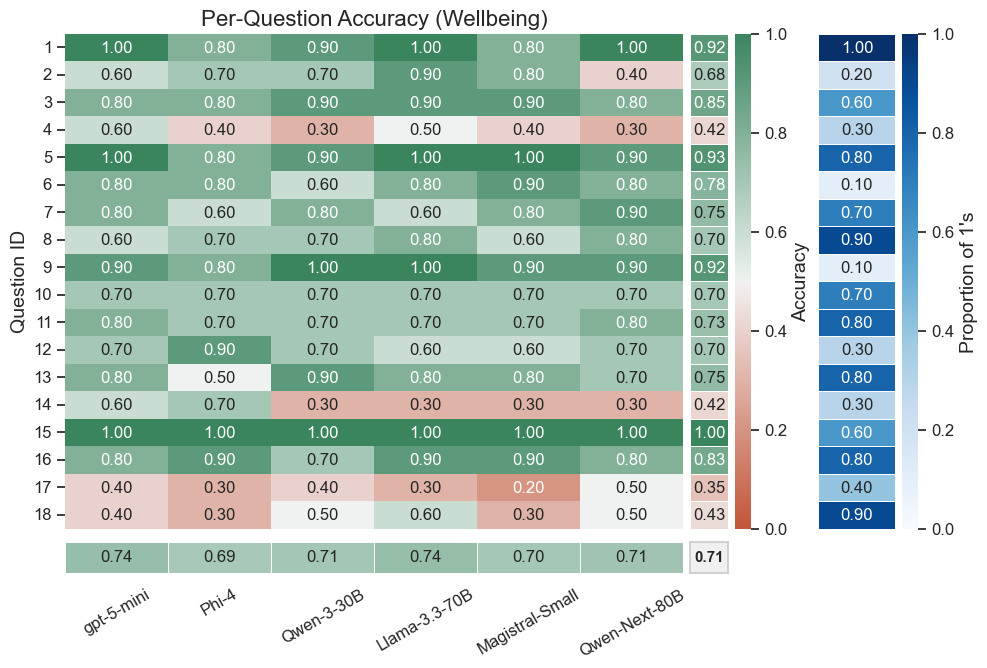

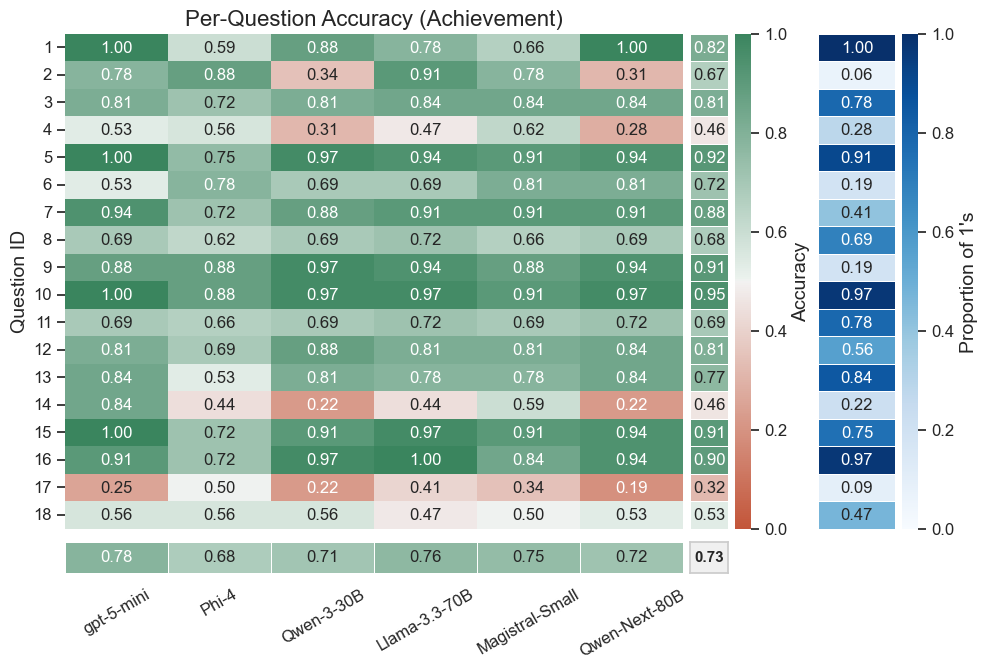

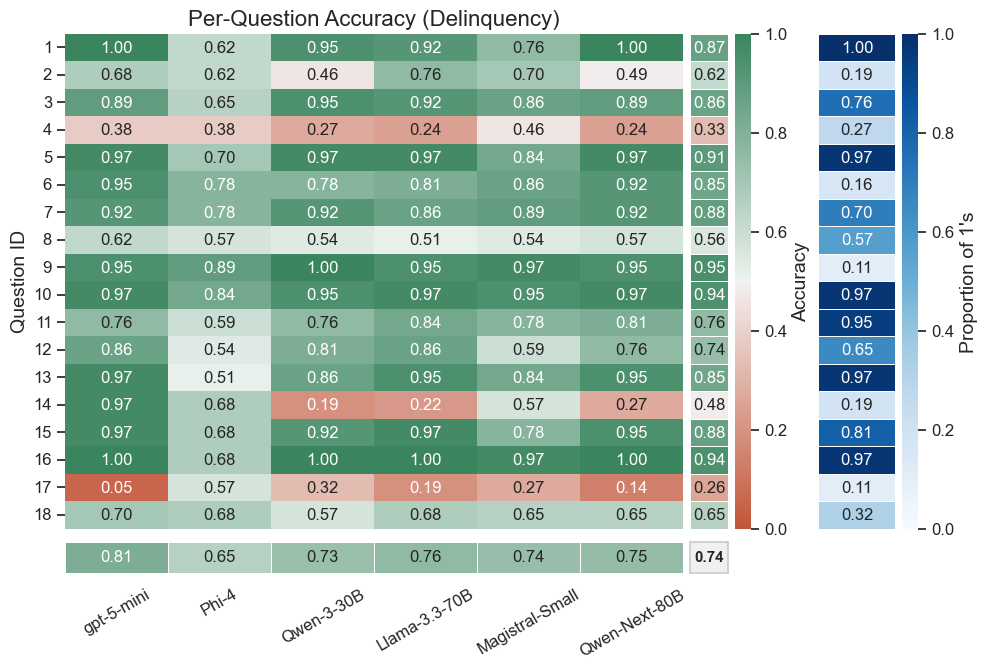

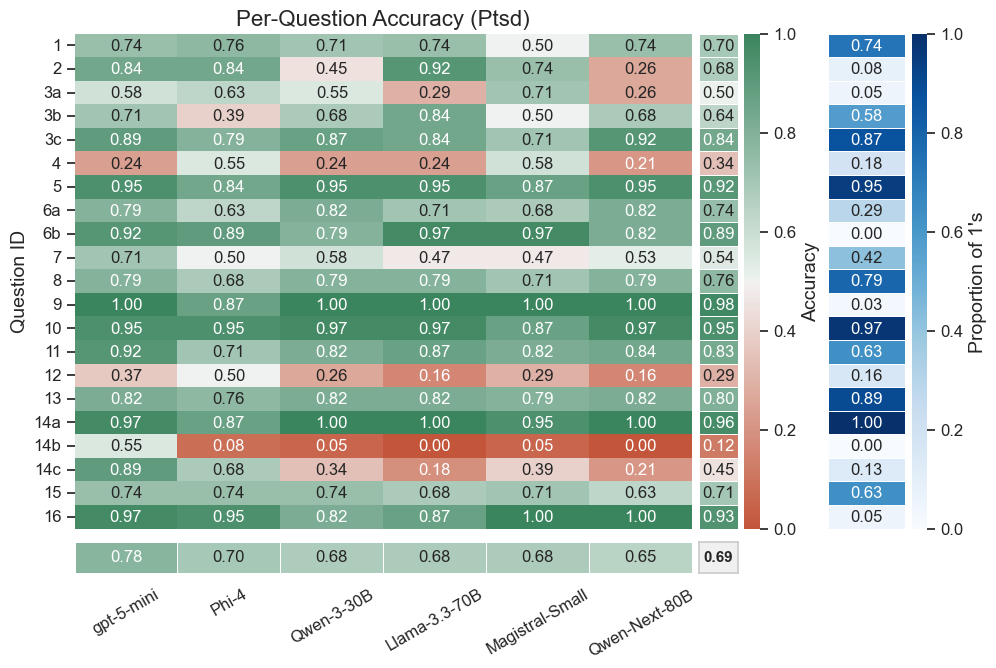

In [109]:
acc_dfs = []
# Load labels
for subfolder in SUBFOLDERS:
    df_labels = pd.read_csv(f"./human_labels/{subfolder}.csv", delimiter=";", dtype=int)
    df_labels = df_labels.melt(
        id_vars=["paper_id"], var_name="question_id", value_name="answer"
    )
    df_labels["paper_id"] = df_labels["paper_id"].astype(int)
    df_labels["question_id"] = df_labels["question_id"].astype(int)
    df_labels["answer"] = df_labels["answer"].astype(int)


    files = [
        f"Qwen_Qwen3-Embedding-8B_gpt-5-mini_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_microsoft_phi-4_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
    ]
    

    acc_df = load_llm_accuracies_with_human(df_labels, files)
    plot_accuracy_with_human(acc_df, subfolder)
    acc_dfs.append(acc_df)

In [ ]:
def load_llm_scores(df_labels, files):
    """
    Aggregate total/average scores per paper from each prediction file
    and compare them with the true scores from df_labels.
    """

    scores_data = {}

    for i, f in enumerate(files):
        df = pd.read_csv(f"{PATH}/{f}")
        # Sum or average the scores per paper (adjust depending on your scale)
        paper_scores = df.groupby("paper_id")["answer"].sum()
        scores_data[LABELS[i]] = paper_scores

    # Combine all models' paper-level scores
    scores_df = pd.DataFrame(scores_data).sort_index()

    # Compute the true total scores per paper
    true_scores = df_labels.groupby("paper_id")["answer"].sum()
    scores_df["true_score"] = true_scores
    scores_df = scores_df.reset_index()

    # Compute rank order per column
    rank_df = scores_df.rank(ascending=False, method="dense")
    rank_df = rank_df.reset_index()

    # Compare rank differences between each model and the true labels
    rank_diff = rank_df.subtract(rank_df["true_score"], axis=0)
    rank_diff = rank_diff.reset_index()

    return scores_df, rank_df, rank_diff

def plot_rank_correlation(rank_dfs, labels):
    fig, axes = plt.subplots(1, len(rank_dfs), figsize=(6*len(rank_dfs), 5))
    if len(rank_dfs) == 1:
        axes = [axes]

    for i, (df, ax) in enumerate(zip(rank_dfs, axes)):
        # Select only score columns (exclude 'paper_id' or other metadata)
        score_cols = [c for c in df.columns if c not in ["paper_id", "true_score", "index"]]
        score_cols.append("true_score")  # include human score for correlation

        corr = df[score_cols].corr(method="spearman")
        sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
        ax.set_title(f"Rank Correlation - {labels[i]}")

    plt.tight_layout()
    plt.show()

def plot_scores_by_paper(scores_df, case_label):
    """
    scores_df: DataFrame with columns ['paper_id', 'true_score', model1, model2, ...]
    """
    # Sort papers by true_score
    scores_df = scores_df.sort_values("true_score").reset_index(drop=True)
    x = range(len(scores_df))  # numeric positions for plotting

    plt.figure(figsize=(12, 5))
    
    # Plot true score as a line
    plt.plot(x, scores_df["true_score"], label="Human (True)", color="black", linewidth=2)

    # Plot each LLM as scatter points
    llm_cols = [c for c in scores_df.columns if c not in ["paper_id", "true_score", "index"]]
    colors = sns.color_palette("tab10", n_colors=len(llm_cols))
    
    for col, color in zip(llm_cols, colors):
        plt.scatter(x, scores_df[col], label=col, color=color, s=50, alpha=0.7)

    # Set paper_ids as x-tick labels
    plt.xticks(x, scores_df["paper_id"].astype(int), rotation=0)
    
    plt.xlabel("Paper ID (sorted by human score)")
    plt.ylabel("Score")
    plt.title(f"Scores per Paper - {case_label}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

from scipy.stats import spearmanr

def best_matching_llm_rank(scores_df):
    llm_cols = [c for c in scores_df.columns if c not in ["paper_id", "true_score", "index"]]
    correlations = {}
    
    for col in llm_cols:
        corr, _ = spearmanr(scores_df["true_score"], scores_df[col])
        correlations[col] = corr
    
    best_llm = max(correlations, key=correlations.get)
    return best_llm, correlations

def best_matching_llm_rank(scores_df):
    llm_cols = [c for c in scores_df.columns if c not in ["paper_id", "true_score", "index"]]
    correlations = {}
    
    for col in llm_cols:
        corr, _ = spearmanr(scores_df["true_score"], scores_df[col])
        correlations[col] = corr
    
    best_llm = max(correlations, key=correlations.get)
    return best_llm, correlations

def best_matching_llm_mae(scores_df):
    llm_cols = [c for c in scores_df.columns if c not in ["paper_id", "true_score", "index"]]
    maes = {}
    
    for col in llm_cols:
        maes[col] = (scores_df[col] - scores_df["true_score"]).abs().mean()
    
    best_llm = min(maes, key=maes.get)
    return best_llm, maes

import numpy as np

def best_matching_llm_rmse(scores_df):
    llm_cols = [c for c in scores_df.columns if c not in ["paper_id", "true_score", "index"]]
    rmses = {}
    
    for col in llm_cols:
        rmses[col] = np.sqrt(((scores_df[col] - scores_df["true_score"])**2).mean())
    
    best_llm = min(rmses, key=rmses.get)
    return best_llm, rmses

def ranking_agreement(rank_df, epsilon=2):
    """
    rank_df: DataFrame with columns ['paper_id', 'true_score', model1, model2, ...]
             ranks are precomputed (1 = highest)
    epsilon: allowed rank difference
    Returns: series with fraction of papers within epsilon for each model
    """
    llm_cols = [c for c in rank_df.columns if c not in ["paper_id", "true_score", "index"]]
    true_ranks = rank_df["true_score"]
    agreement = {}

    for col in llm_cols:
        diffs = (rank_df[col] - true_ranks).abs()
        agreement[col] = (diffs <= epsilon).mean()  # fraction of papers within epsilon

    return pd.Series(agreement)

def plot_ranking_agreement(all_case_agreements, case_labels):
    """
    all_case_agreements: list of Series from ranking_agreement(), one per case study
    case_labels: list of case study names
    """
    df_plot = pd.DataFrame(all_case_agreements, index=case_labels)
    df_plot.T.plot(kind="bar", figsize=(10, 6))
    plt.ylabel(f"Fraction of papers within epsilon")
    plt.title("LLM Ranking Agreement with Human (epsilon method)")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.legend(title="Case Study")
    plt.tight_layout()
    plt.show()

def plot_ranking_scatter_with_epsilon(rank_df, case_label, epsilon=2):
    """
    rank_df: DataFrame with columns ['paper_id', 'true_score', model1, model2, ...]
             ranks are precomputed (1 = highest)
    epsilon: allowed rank deviation
    """
    # Sort by true ranks for x-axis
    rank_df = rank_df.sort_values("true_score").reset_index(drop=True)
    x = range(len(rank_df))  # numeric positions for plotting

    plt.figure(figsize=(12, 5))

    # True rank line
    plt.plot(x, rank_df["true_score"], label="Human Rank", color="black", linewidth=2)

    # Shaded epsilon area
    plt.fill_between(
        x,
        rank_df["true_score"] - epsilon,
        rank_df["true_score"] + epsilon,
        color="gray",
        alpha=0.2,
        label=f"±{epsilon} ranks"
    )

    # Plot LLM ranks
    llm_cols = [c for c in rank_df.columns if c not in ["paper_id", "true_score", "index"]]
    colors = plt.cm.tab10.colors  # up to 10 colors
    for col, color in zip(llm_cols, colors):
        plt.scatter(x, rank_df[col], label=col, color=color, s=50, alpha=0.7)

    # Set paper_ids as x-tick labels
    plt.xticks(x, rank_df["paper_id"].astype(int), rotation=0)

    plt.xlabel("Paper ID (sorted by human rank)")
    plt.ylabel("Rank")
    plt.title(f"LLM Ranking vs Human - {case_label}")
    plt.gca().invert_yaxis()  # rank 1 at top
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

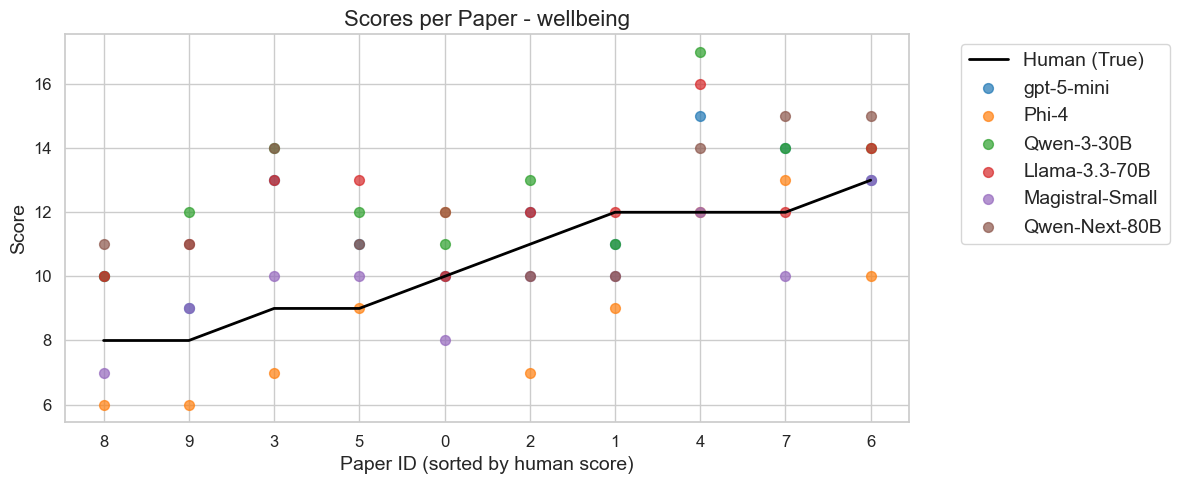

Best matching LLM (Spearman) for wellbeing: Magistral-Small with correlations {'gpt-5-mini': np.float64(0.7009651926150554), 'Phi-4': np.float64(0.7375144047188897), 'Qwen-3-30B': np.float64(0.5283018867924528), 'Llama-3.3-70B': np.float64(0.5566037735849056), 'Magistral-Small': np.float64(0.7837262588683188), 'Qwen-Next-80B': np.float64(0.4006329082481912)}
Best matching LLM (MAE) for wellbeing: Magistral-Small with correlations {'gpt-5-mini': np.float64(1.6), 'Phi-4': np.float64(1.9), 'Qwen-3-30B': np.float64(2.6), 'Llama-3.3-70B': np.float64(1.9), 'Magistral-Small': np.float64(1.1), 'Qwen-Next-80B': np.float64(2.5)}
Best matching LLM (RMSE) for wellbeing: Magistral-Small with correlations {'gpt-5-mini': np.float64(2.0), 'Phi-4': np.float64(2.258317958127243), 'Qwen-3-30B': np.float64(3.0), 'Llama-3.3-70B': np.float64(2.5099800796022267), 'Magistral-Small': np.float64(1.3038404810405297), 'Qwen-Next-80B': np.float64(2.701851217221259)}


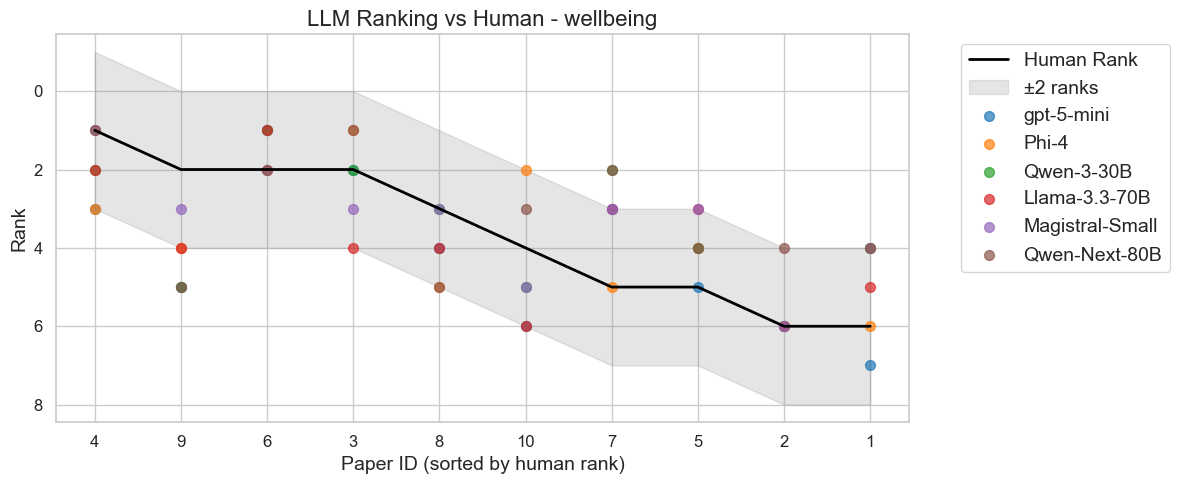

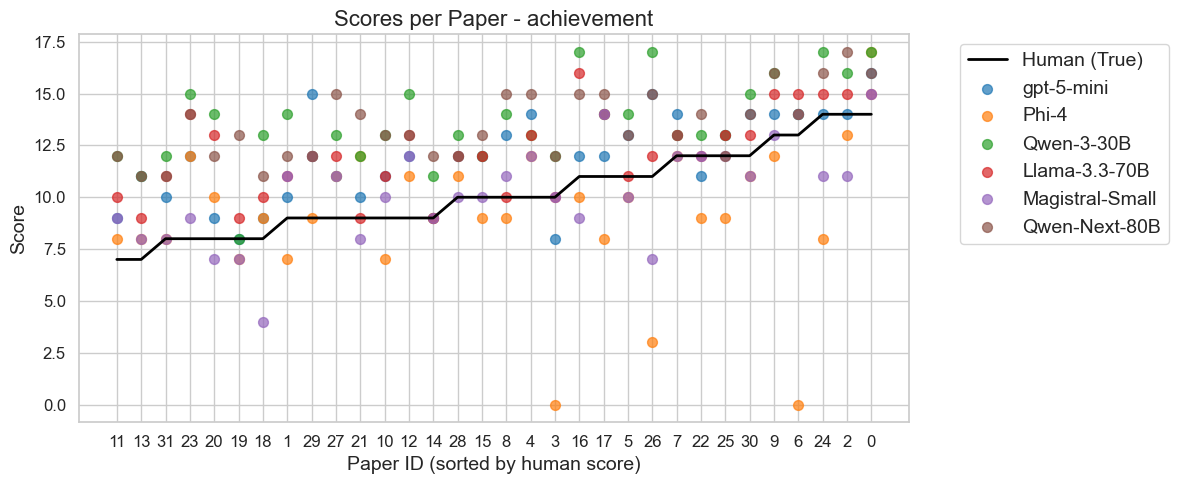

Best matching LLM (Spearman) for achievement: gpt-5-mini with correlations {'gpt-5-mini': np.float64(0.7219045865434319), 'Phi-4': np.float64(0.24168623463136096), 'Qwen-3-30B': np.float64(0.6046201116991881), 'Llama-3.3-70B': np.float64(0.6734464365508387), 'Magistral-Small': np.float64(0.6694134721370146), 'Qwen-Next-80B': np.float64(0.6720507198970304)}
Best matching LLM (MAE) for achievement: Magistral-Small with correlations {'gpt-5-mini': np.float64(1.875), 'Phi-4': np.float64(2.5), 'Qwen-3-30B': np.float64(3.375), 'Llama-3.3-70B': np.float64(1.9375), 'Magistral-Small': np.float64(1.375), 'Qwen-Next-80B': np.float64(3.28125)}
Best matching LLM (RMSE) for achievement: Magistral-Small with correlations {'gpt-5-mini': np.float64(2.318404623873926), 'Phi-4': np.float64(3.816084380618437), 'Qwen-3-30B': np.float64(3.783186487605389), 'Llama-3.3-70B': np.float64(2.4748737341529163), 'Magistral-Small': np.float64(1.8371173070873836), 'Qwen-Next-80B': np.float64(3.5838177967078626)}


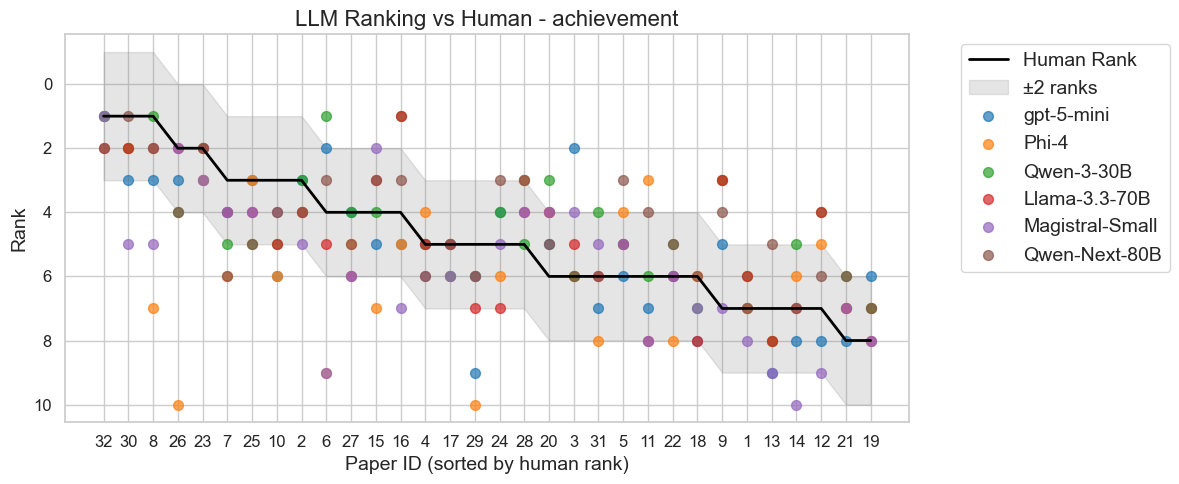

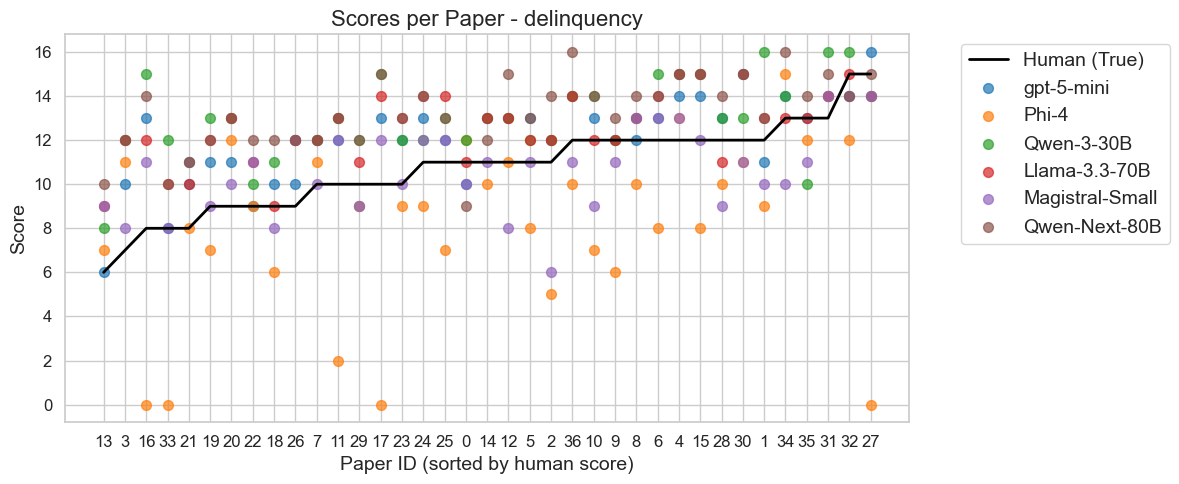

Best matching LLM (Spearman) for delinquency: gpt-5-mini with correlations {'gpt-5-mini': np.float64(0.7729307557847209), 'Phi-4': np.float64(0.3324645749726582), 'Qwen-3-30B': np.float64(0.5488222619989617), 'Llama-3.3-70B': np.float64(0.6378681605027899), 'Magistral-Small': np.float64(0.47148072534312174), 'Qwen-Next-80B': np.float64(0.7120517301463222)}
Best matching LLM (MAE) for delinquency: gpt-5-mini with correlations {'gpt-5-mini': np.float64(1.4594594594594594), 'Phi-4': np.float64(3.2972972972972974), 'Qwen-3-30B': np.float64(2.3783783783783785), 'Llama-3.3-70B': np.float64(1.9189189189189189), 'Magistral-Small': np.float64(1.4864864864864864), 'Qwen-Next-80B': np.float64(2.6486486486486487)}
Best matching LLM (RMSE) for delinquency: gpt-5-mini with correlations {'gpt-5-mini': np.float64(1.785830112073707), 'Phi-4': np.float64(4.55002227496775), 'Qwen-3-30B': np.float64(2.7802391497368943), 'Llama-3.3-70B': np.float64(2.3423250172609453), 'Magistral-Small': np.float64(1.89594

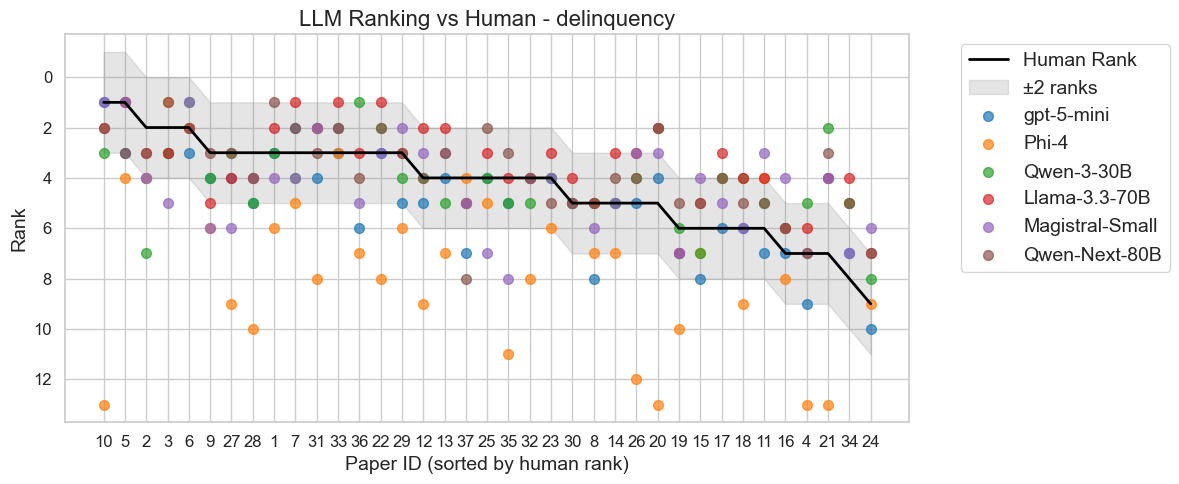

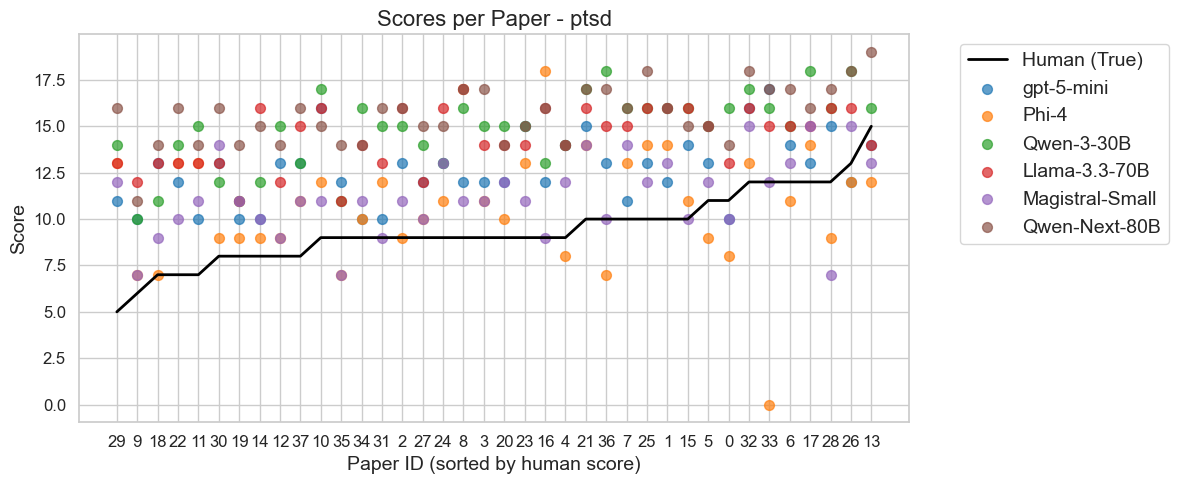

Best matching LLM (Spearman) for ptsd: Qwen-3-30B with correlations {'gpt-5-mini': np.float64(0.4652457942300284), 'Phi-4': np.float64(0.1343474262134241), 'Qwen-3-30B': np.float64(0.7454269280988405), 'Llama-3.3-70B': np.float64(0.4972407745749196), 'Magistral-Small': np.float64(0.4500698242425372), 'Qwen-Next-80B': np.float64(0.5828045033617982)}
Best matching LLM (MAE) for ptsd: Magistral-Small with correlations {'gpt-5-mini': np.float64(3.3421052631578947), 'Phi-4': np.float64(2.9473684210526314), 'Qwen-3-30B': np.float64(5.342105263157895), 'Llama-3.3-70B': np.float64(5.0), 'Magistral-Small': np.float64(2.3157894736842106), 'Qwen-Next-80B': np.float64(6.184210526315789)}
Best matching LLM (RMSE) for ptsd: Magistral-Small with correlations {'gpt-5-mini': np.float64(3.731092686007538), 'Phi-4': np.float64(3.953679165962815), 'Qwen-3-30B': np.float64(5.607795326244765), 'Llama-3.3-70B': np.float64(5.301439725008174), 'Magistral-Small': np.float64(2.809757434745082), 'Qwen-Next-80B': 

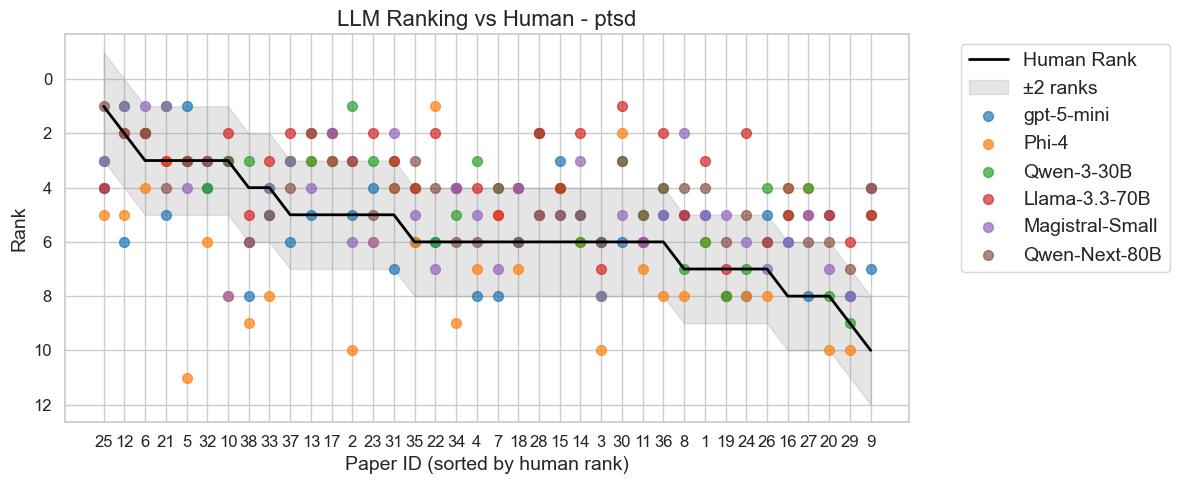

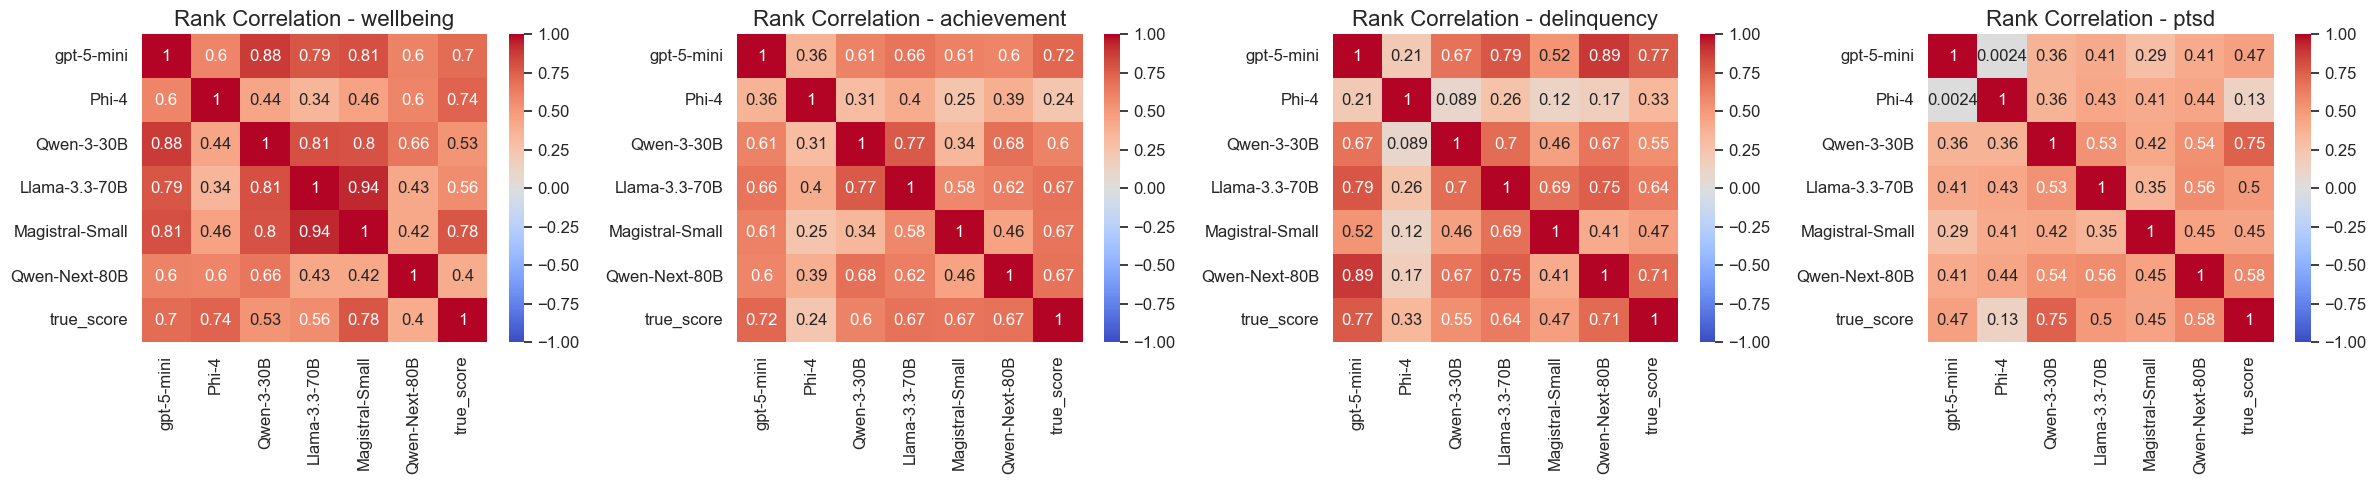

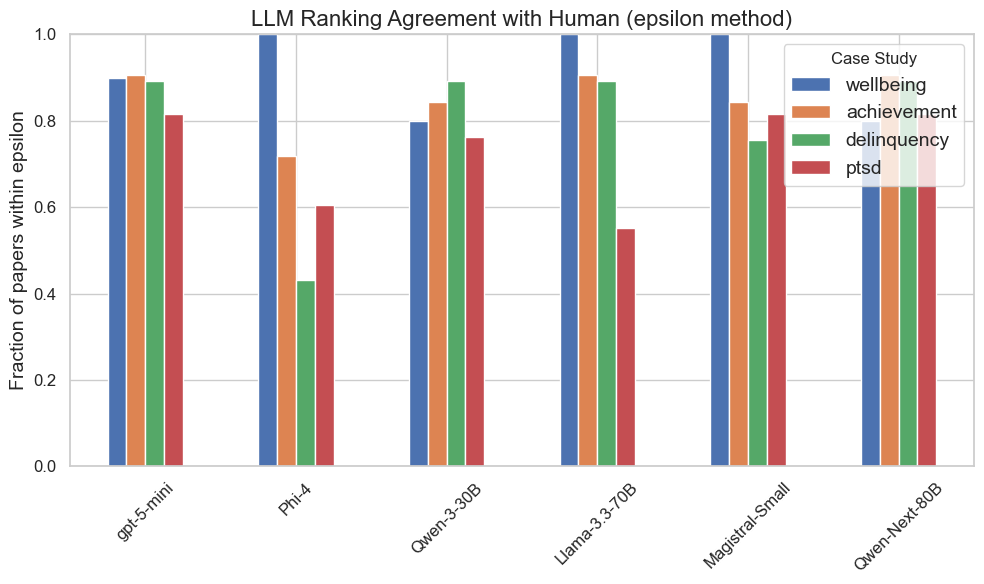

In [151]:
scores_dfs = []
rank_dfs = []
rank_diffs = []
rank_agreements = []
# Load labels
for subfolder in SUBFOLDERS:
    df_labels = pd.read_csv(f"./human_labels/{subfolder}.csv", delimiter=";", dtype=int)
    df_labels = df_labels.melt(
        id_vars=["paper_id"], var_name="question_id", value_name="answer"
    )
    df_labels["paper_id"] = df_labels["paper_id"].astype(int)
    df_labels["question_id"] = df_labels["question_id"].astype(int)
    df_labels["answer"] = df_labels["answer"].astype(int)


    files = [
        f"Qwen_Qwen3-Embedding-8B_gpt-5-mini_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_microsoft_phi-4_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
    ]
    

    scores_df, rank_df, rank_diff = load_llm_scores(df_labels, files)
    #plot_accuracy_with_human(acc_df, subfolder)
    scores_dfs.append(scores_df)
    rank_dfs.append(rank_df)
    rank_diffs.append(rank_diff)
    plot_scores_by_paper(scores_df, subfolder)
    best_llm_sp, correlations = best_matching_llm_rank(scores_df)
    print(f"Best matching LLM (Spearman) for {subfolder}: {best_llm_sp} with correlations {correlations}")
    best_llm_mae, maes = best_matching_llm_mae(scores_df)
    print(f"Best matching LLM (MAE) for {subfolder}: {best_llm_mae} with correlations {maes}")
    best_llm_rmse, rmses = best_matching_llm_rmse(scores_df)
    print(f"Best matching LLM (RMSE) for {subfolder}: {best_llm_rmse} with correlations {rmses}")

    rank_agreements.append(ranking_agreement(rank_df, epsilon=2))
    plot_ranking_scatter_with_epsilon(rank_df, subfolder, epsilon=2)


plot_rank_correlation(rank_dfs, SUBFOLDERS)
plot_ranking_agreement(rank_agreements, SUBFOLDERS)

In [152]:
scores_df.head()

,paper_id,gpt-5-mini,Phi-4,Qwen-3-30B,Llama-3.3-70B,Magistral-Small,Qwen-Next-80B,true_score
0,0,10,8,16,13,10,14,11
1,1,12,14,16,16,13,16,10
2,2,13,9,15,16,11,16,9
3,3,12,11,15,14,11,17,9
4,4,14,8,14,14,12,14,9


In [153]:
rank_df.head()

,index,paper_id,gpt-5-mini,Phi-4,Qwen-3-30B,Llama-3.3-70B,Magistral-Small,Qwen-Next-80B,true_score
0,0,38.0,8.0,9.0,3.0,5.0,6.0,6.0,4.0
1,1,37.0,6.0,3.0,3.0,2.0,3.0,4.0,5.0
2,2,36.0,5.0,8.0,4.0,2.0,5.0,4.0,6.0
3,3,35.0,6.0,6.0,4.0,4.0,5.0,3.0,6.0
4,4,34.0,4.0,9.0,5.0,4.0,4.0,6.0,6.0


In [154]:
rank_diff.head()

,level_0,index,paper_id,gpt-5-mini,Phi-4,Qwen-3-30B,Llama-3.3-70B,Magistral-Small,Qwen-Next-80B,true_score
0,0,-4.0,34.0,4.0,5.0,-1.0,1.0,2.0,2.0,0.0
1,1,-4.0,32.0,1.0,-2.0,-2.0,-3.0,-2.0,-1.0,0.0
2,2,-4.0,30.0,-1.0,2.0,-2.0,-4.0,-1.0,-2.0,0.0
3,3,-3.0,29.0,0.0,0.0,-2.0,-2.0,-1.0,-3.0,0.0
4,4,-2.0,28.0,-2.0,3.0,-1.0,-2.0,-2.0,0.0,0.0
